In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load train Data
titanic_data = pd.read_csv('/Users/DylanC/Desktop/Kaggle/Titanic_survival/train.csv')

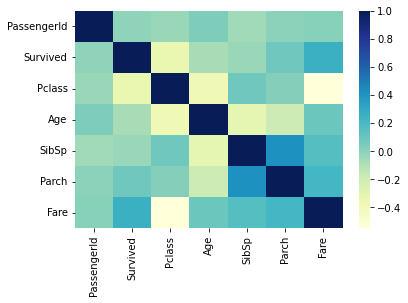

In [5]:
# plot a simple correlation heatmap
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
plt.show()

In [6]:
#可以看出Suvived與其他feature都是negativelty correlated
# corr=0代表兩個feature間的相關性是“隨機”的
# corr為正時，代表一個feature數值上升，另一個也跟著上升；corr為負時，代表一個feature數值上升，另一個卻跟著下降
titanic_data.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## stratified shuffle split: 
parameter --

shuffle：布尔值，可选参数。默认是None。在划分数据之前先打乱数据。如果shuffle=FALSE，则stratify必须是None。

stratify：array-like或者None，默认是None。如果不是None，将会利用数据的标签将数据分层划分。

若为None时，划分出来的测试集或训练集中，其类标签的比例也是随机的。

若不为None时，划分出来的测试集或训练集中，其类标签的比例同输入的数组中类标签的比例相同，可以用于处理不均衡的数据集。
————————————————
版权声明：本文为CSDN博主「夏洛的网」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/liuxiao214/article/details/79019901

StratifiedShuffleSplit 打乱数据集用的，类似train_test_split()函数， 但是和后者不一样，后者是给定一个数据集，比如我10个训练样本， 然后给出一个比例，比如8:2，那么我就随机按照比例把数据集分成8个训练集2个测试集样本。 但是前者不仅要进行随机打乱，最后选取的测试集和训练集的时候还要考虑样本类别的比例， 也就是我们说的分层抽样， train_test_split()可以理解成纯随机抽样，不考虑任何分布， 而StratifiedShuffle()可以理解成分成抽样，考虑类别的分布

In [7]:
# stratified shuffle split: random shuffle and pick 80% for train set, 20% for test set, and avoid skewed
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# we want to split the titanic_data, so the following features are equally distributed.
# we want to have equal ratio of Survived and not Survived in training and testing datasets
# split(X, y)按照y的值将数据集分为训练集或测试集，保证训练集和测试集中各类y值所占的比例与原数据集相同。
# https://blog.csdn.net/dss_dssssd/article/details/82818601
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [8]:
strat_train_set #train_size=0.8

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S


In [9]:
strat_test_set #test_size=0.2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S


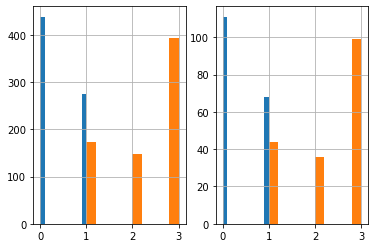

In [10]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist() #blue bar
strat_train_set['Pclass'].hist() #orange bar

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show() # Therefore, we've got equal distribution for train test sets after stratified split

In [11]:
strat_train_set.info() # find out features with missing value - Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 264 to 772
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Pipeline: Fill and impute missing values, i.e "Age" - imputation 

In [12]:
# A class allows us to create an object and call fit_transform, and then we can chain them together into a pipeline.
# BaseEstimator: a class to define fit_transform and define basic estimator 
# TransformerMixin: allows us to automatically mix fit and transform into fit_transform without having to define it explicitly.
# https://www.cnblogs.com/learn-the-hard-way/p/12532888.html#transformermixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X['Age'].array.reshape(-1,1))
        return X

## Pipeline: one-hot code machine learning for 'Embarked' and 'Sex'

In [13]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X['Embarked'].array.reshape(-1,1)).toarray()
        #統一轉換為array因為有時候data形式是dataframe, 有時候是numpy array，使用toarray以免稀疏矩陣顯示。
        # we take matrix and iterate through the columns, and then transpose the matrix and set column by column.
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)): # T means transpose: flip dimensions
            X[column_names[i]] = matrix.T[i] # make new columns and make format to the same, so we flip the axes
        
        matrix = encoder.fit_transform(X['Sex'].array.reshape(-1,1)).toarray()
            
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [14]:
# strat_train_set['Embarked'].shape
# test = strat_train_set['Embarked'].array.reshape(-1, 1)
# test

In [15]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# matrix = encoder.fit_transform(test).toarray()
# matrix

## Drop features that are NOT important

In [16]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Sex", "Name", "Ticket", "Cabin", "N"], axis=1, errors='ignore') 
    #drop "Embarked" and "Sex" columns becasue we've created those one-hot codes, and in case errror comes as 'N'
    

#### We will use above 3 estimators in the pipeline.
## Define Pipeline below:

In [17]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),  #AgeImputer is one of the objects for pipeline
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())]) 

### Now we can run the whole datasets through the pipeline

In [18]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [19]:
# we have seperate columns "C", "S", "Q", "Female", "Male" ,and 'Age' being imputed
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
264,265,0,3,29.608375,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
341,342,1,1,24.000000,3,2,263.0000,0.0,0.0,1.0,1.0,0.0
43,44,1,2,3.000000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
84,85,1,2,17.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
569,570,1,3,32.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,0,3,43.000000,0,0,6.4500,0.0,0.0,1.0,0.0,1.0
645,646,1,1,48.000000,1,0,76.7292,1.0,0.0,0.0,0.0,1.0
783,784,0,3,29.608375,1,2,23.4500,0.0,0.0,1.0,0.0,1.0
134,135,0,2,25.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [20]:
strat_train_set.info() # missing values have been filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 264 to 772
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


## Train Training data

In [21]:
# 特徵工程-標準化
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X) # the numerical features should be scaled as it makes it easier for the models to handle.
y_data = y.to_numpy() # we don't want to scale the survival and we need numpy array


In [22]:
X_data

array([[-6.90228292e-01,  8.27893418e-01, -2.75427806e-16, ...,
        -1.57803551e+00,  1.35941164e+00, -1.35941164e+00],
       [-3.87683632e-01, -1.56828591e+00, -4.34795044e-01, ...,
         6.33699300e-01,  1.35941164e+00, -1.35941164e+00],
       [-1.55857076e+00, -3.70196244e-01, -2.06284178e+00, ...,
        -1.57803551e+00,  1.35941164e+00, -1.35941164e+00],
       ...,
       [ 1.34900130e+00,  8.27893418e-01, -2.75427806e-16, ...,
         6.33699300e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.20101798e+00, -3.70196244e-01, -3.57269008e-01, ...,
         6.33699300e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.30578063e+00, -3.70196244e-01,  2.12356412e+00, ...,
         6.33699300e-01,  1.35941164e+00, -1.35941164e+00]])

## Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier() # 不在手動填，而是依靠底下的grid search和cv去幫忙決定n_estimators樹木要多少
# 加入網格搜索與交叉驗證
# 參數準備
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
final_clf = grid_search.best_estimator_
print("最好的参数模型:\n", final_clf)

最好的参数模型:
 RandomForestClassifier(min_samples_split=3, n_estimators=10)


## run the whole datasets through the pipeline - test sets

In [25]:
strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
374,375,0,3,3.000000,3,1,21.0750,0.0,0.0,1.0,1.0,0.0
739,740,0,3,30.046149,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
484,485,1,1,25.000000,1,0,91.0792,1.0,0.0,0.0,0.0,1.0
12,13,0,3,20.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
405,406,0,2,34.000000,1,0,21.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,0,1,21.000000,0,1,77.2875,0.0,0.0,1.0,0.0,1.0
884,885,0,3,25.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
229,230,0,3,30.046149,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
442,443,0,3,25.000000,1,0,7.7750,0.0,0.0,1.0,0.0,1.0


### Score Model

In [26]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [27]:
# we give the test data and we want to see how good the prediction of this model is, compared to the actual data.
score = final_clf.score(X_data_test, y_data_test)
print("準確率為:\n", score)

準確率為:
 0.8324022346368715


### Get the score with actual data

In [28]:
# use combined train and test data, which is titanic_data and get it pipelined and then do prediction to get actual result.
final_data = pipeline.fit_transform(titanic_data)

In [29]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [30]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [31]:
X_data_final

array([[-1.73010796,  0.82737724, -0.5924806 , ...,  0.61930636,
        -0.73769513,  0.73769513],
       [-1.72622007, -1.56610693,  0.63878901, ..., -1.61470971,
         1.35557354, -1.35557354],
       [-1.72233219,  0.82737724, -0.2846632 , ...,  0.61930636,
         1.35557354, -1.35557354],
       ...,
       [ 1.72233219,  0.82737724,  0.        , ...,  0.61930636,
         1.35557354, -1.35557354],
       [ 1.72622007, -1.56610693, -0.2846632 , ..., -1.61470971,
        -0.73769513,  0.73769513],
       [ 1.73010796,  0.82737724,  0.17706291, ..., -1.61470971,
        -0.73769513,  0.73769513]])

In [32]:
prod_clf = RandomForestClassifier() # 不在手動填，而是依靠底下的grid search和cv去幫忙決定n_estimators樹木要多少
# 加入網格搜索與交叉驗證
# 參數準備
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_
print("最好的参数模型:\n", prod_final_clf)

最好的参数模型:
 RandomForestClassifier(max_depth=5, min_samples_split=3)


# make predictions on the test data

In [34]:
# Load test Data
titanic_test_data = pd.read_csv('/Users/DylanC/Desktop/Kaggle/Titanic_survival/test.csv')


In [35]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [36]:
final_test_data.info() # "Fare" has a NaN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [37]:
# Fill the missing value
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [38]:
predictions = prod_final_clf.predict(X_data_final_test)

In [39]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("/Users/DylanC/Desktop/Kaggle/Titanic_survival/predictions_result.csv", index=False)

In [40]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
